# Notebook 4 - Neural Networks (MLP)

CSI4106 Artificial Intelligence  
Fall 2019  
Prepared by Caroline Barrière and Julian Templeton

***INTRODUCTION***:  

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission to a hospital, provided a certain set of features describing their physical state, the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered. The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of three packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, (2) **pandas**, a must-have for data science, and (3) **matplotlib** which is a great plotting library (pip install matplotlib).  Make sure you have the LATEST version of scikit-learn (at least version >= 0.20), otherwise some functions (the one-hot-encoder) will not work.

As this is your 4th notebook this semester, some instructions will be a bit less explicit and may require looking at some online official documentation. If you have any assumptions state them and think about how to handle the questions.

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, Sign the notebook (at the end of the notebook), and submit it.  

*The notebook will be marked on 32.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes).

Next download the dataset from the UCI archive (click *Data Folder* --> download *dataset_diabetes.zip*):
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments. The file must be located at *dataset_diabetes/diabetic_data.csv* from the same directory as this notebook.

**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file. Pandas will create a data structure called a dataframe, which will contain all the data. Dataframes are a crucial data structure that allows makes it very easy to analyze the data that you are working with, retrieve subsets of the data based on search conditions, and utilize the data in Machine Learning algorithms.

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* (or whichever method you have been using to install the packages) at the command prompt to have access to these packages.

In [1]:
# Import the required packages for data analysis and machine learning
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

The following code reads the csv file into a dataframe and shows the top ten rows from the read data.  
Note that ? means that the value is *missing* from the dataset.

In [2]:
# Read the dataset, show top ten rows
X = pd.read_csv("dataset_diabetes/diabetic_data.csv")
X.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [4]:
# Examples of data exploration
print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO DO) Q1 - 3 marks**  (0.5 each)    
Inspired by the code above, write code to answer the following questions. Your code must help in finding the answer. Print the question that you are answering along with the answer that the code helped find (can manually write specific code, as long as the code helps to get the answer).

1. How many examples are in the dataset?
2. How many features are in the dataset?
3. How many target classes are in the dataset?
4. What are the possible weight ranges (including ?), and the number of examples in each?
5. What are the prior probabilities of each class (NO, <30, >30)?
6. Are there any patients present in the dataset more than 20 times?

In [5]:
# 1. How many examples are in the dataset?
print("1. ")
print("There are", X.shape[0], "many examples in the dataset.")

# 2. How many features are in the dataset?
print("2.")
print("There are", X.shape[1] - 1, "many features in the dataset.")

# 3. How many target classes are in the dataset?
print("3.")
print("There are", X.shape[1] - (X.shape[1] - 1), "many target classes in the dataset.")

# 4. What are the possible weight ranges, and the number of examples in each?
print("4.")
print("The weight ranges are: ([Weight_range), examples in range)")
for weightRange in X['weight'].value_counts().iteritems():
    print(weightRange)

# 5. What are the prior probabilities of each class (NO, <30, >30)?
print("5.")
for readmittedRange in X['readmitted'].value_counts().iteritems():
    print("Prior probability of", readmittedRange[0], "is", (readmittedRange[1] / X['readmitted'].shape[0]))

# 6. Are there some patient present in the dataset more than 20 times?
print("6.")
for patient in X['patient_nbr'].value_counts().iteritems():
    if (patient[1] > 20): print("Patient", patient[0], "is present in the dataset more than 20 times.")


1. 
There are 101766 many examples in the dataset.
2.
There are 49 many features in the dataset.
3.
There are 1 many target classes in the dataset.
4.
The weight ranges are: ([Weight_range), examples in range)
('?', 98569)
('[75-100)', 1336)
('[50-75)', 897)
('[100-125)', 625)
('[125-150)', 145)
('[25-50)', 97)
('[0-25)', 48)
('[150-175)', 35)
('[175-200)', 11)
('>200', 3)
5.
Prior probability of NO is 0.5391191557101586
Prior probability of >30 is 0.3492816854352141
Prior probability of <30 is 0.11159915885462728
6.
Patient 88785891 is present in the dataset more than 20 times.
Patient 43140906 is present in the dataset more than 20 times.
Patient 23199021 is present in the dataset more than 20 times.
Patient 1660293 is present in the dataset more than 20 times.
Patient 88227540 is present in the dataset more than 20 times.
Patient 23643405 is present in the dataset more than 20 times.
Patient 84428613 is present in the dataset more than 20 times.
Patient 92709351 is present in the da

**3. Feature Selection**  
Now that we have taken a look into our data and played with it, we will decide which features would be suitable to use with our model.

Feature selection is just as important as tuning a model (choosing hyperparameters such as the number of layers and their sizes). We need to be sure to choose high quality features that best represent our data in order to maximize the performance of our model. Simply putting every feature or selecting some without analyzing them may provide worse results. Thus, we need to consider which features to use by looking at the data itself to see if it would be a good match.

Some issues when working with data include:
1. Is the data well distributed? That is, does it contain enough variety to provide a good split on the data.
2. Are there missing values? The more missing values --> the less well these will work as features for many Machine Learning algorithms. Here, we will not focus on this issue, but it is important to know.
3. Does this data represent our dataset well.
4. Does the data work well with our selected algorithm (here is does).

**(TO DO) Q2 - 4 marks**   
In this notebook we will work with the following features along with a few others:  
1. gender 
2. age 
3. weight 
4. time_in_hospital

Explore each of the specified features by:   

1) Plotting the distribution (histogram using kind="hist" for numerical data or bar plots using kind="barh" for categorical) and write if the data is well distributed   
2) Identifying the number of missing/unknown/invalid values

Remember, if you have any assumptions that you need to state, state them.

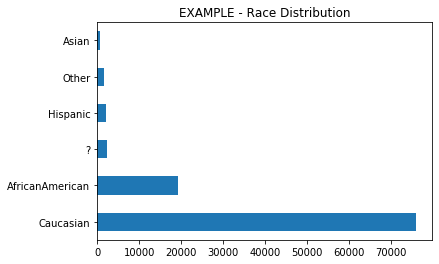

(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.
(Example.2): There are 2273 missing values labelled as '?'.
------------------------------ ^ Example ^ ------------------------------



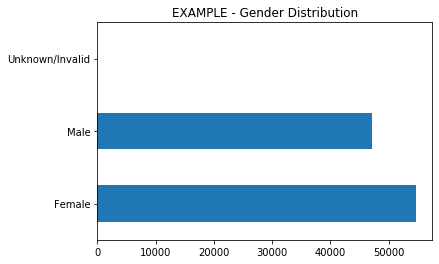

('Female', 54708)
('Male', 47055)
('Unknown/Invalid', 3)
(1.1): Is the feature 'gender' well distributed? Yes it is well distributed with a slight imbalance
(1.2): There are 3 missing values labelled as 'Unknown/Invalid'


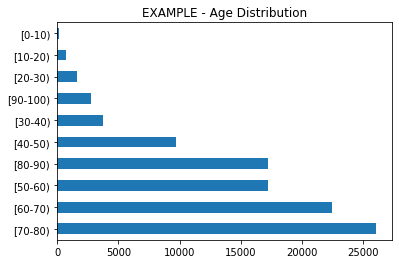

('[70-80)', 26068)
('[60-70)', 22483)
('[50-60)', 17256)
('[80-90)', 17197)
('[40-50)', 9685)
('[30-40)', 3775)
('[90-100)', 2793)
('[20-30)', 1657)
('[10-20)', 691)
('[0-10)', 161)
(2.1): Is the feature 'age' well distributed? No it is not well distributed.
(2.2): There are 0 missing values.


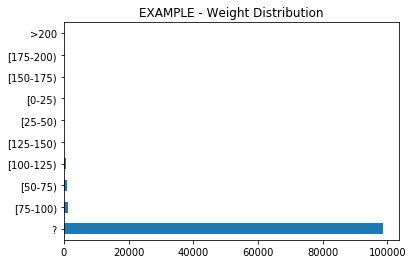

('?', 98569)
('[75-100)', 1336)
('[50-75)', 897)
('[100-125)', 625)
('[125-150)', 145)
('[25-50)', 97)
('[0-25)', 48)
('[150-175)', 35)
('[175-200)', 11)
('>200', 3)
(3.1): Is the feature 'weight' well distributed? No, it is poorly distributed
(3.2): There are 98569 missing values labelled as '?'


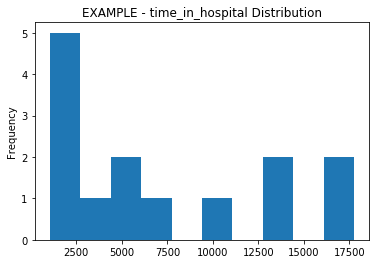

(3, 17756)
(2, 17224)
(1, 14208)
(4, 13924)
(5, 9966)
(6, 7539)
(7, 5859)
(8, 4391)
(9, 3002)
(10, 2342)
(11, 1855)
(12, 1448)
(13, 1210)
(14, 1042)
(4.1): Is the feature 'time_in_hospital' well distributed? No, it is not well distributed.
(4.2): There are 0 missing values.


In [6]:
plt.figure()
X["race"].value_counts().plot(kind="barh", title="EXAMPLE - Race Distribution")
plt.show()
print("(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.")
print("(Example.2): There are 2273 missing values labelled as '?'.")

# gender
plt.figure()
X["gender"].value_counts().plot(kind="barh", title="EXAMPLE - Gender Distribution")
plt.show()
for feature in X['gender'].value_counts().iteritems():
    print(feature)
print("(1.1): Is the feature 'gender' well distributed? Yes it is well distributed with a slight imbalance")
print("(1.2): There are 3 missing values labelled as 'Unknown/Invalid'")

# age
plt.figure()
X["age"].value_counts().plot(kind="barh", title="EXAMPLE - Age Distribution")
plt.show()
for feature in X['age'].value_counts().iteritems():
    print(feature)
print("(2.1): Is the feature 'age' well distributed? No it is not well distributed.")
print("(2.2): There are 0 missing values.")

# weight
plt.figure()
X["weight"].value_counts().plot(kind="barh", title="EXAMPLE - Weight Distribution")
plt.show()
for feature in X['weight'].value_counts().iteritems():
    print(feature)
print("(3.1): Is the feature 'weight' well distributed? No, it is poorly distributed")
print("(3.2): There are 98569 missing values labelled as '?'")

# time_in_hospital
plt.figure()
X["time_in_hospital"].value_counts().plot(kind="hist", title="EXAMPLE - time_in_hospital Distribution")
plt.show()
for feature in X['time_in_hospital'].value_counts().iteritems():
    print(feature)
print("(4.1): Is the feature 'time_in_hospital' well distributed? No, it is not well distributed.")
print("(4.2): There are 0 missing values.")

**4. Preparing the dataset for experimentation**

We will do different steps to prepare the data for experimentations:  (1) extracting the class we wish to predict, (2) splitting the dataset into a training and a test set

In [7]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [8]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
# Look at the shape of the outputs
print(X_train.shape)
print(y_test.shape)

(76324, 49)
(25442,)


In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Setting up our one-hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# Make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# Perform the one-hot encoding using our one-hot encoder on the selected feature set
ohe.fit(X_train_sf)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=False)

In [10]:
# The one-hot-encoder renames the features. Let's take a look at the new names.
feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [11]:
# We can now encode the training and test set with the new features
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO DO) Q3 - 2 marks**   
How many features are there now, after the one-hot-encoder? Why so many? Show the shape of the training set now.

In [12]:
# How many features are there now (must get from code)?
print(X_train_sf_encoded.shape[1])
# Why so many?
print("There are many due to the attributes of each feature being set as its own feature.")
# Show the shape of the training set after the one-hot encoding.
print(X_train_sf_encoded.shape)

241
There are many due to the attributes of each feature being set as its own feature.
(76324, 241)


**5. Baseline model**  
Now that we have setup our encoded features we will start by using a Logistic Regression Classifier to perform supervised learning on our dataset.

***5.1 Defining the Logistic Regression Classifier***   
First we will define our Logistic Regression Classifier with scikit learn.

In [13]:
# Import the Logistic Regression model from scikit and matplot
from sklearn.linear_model import LogisticRegression
import datetime

In [14]:
# Define the model
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)

***5.2 Training the Logistic Regression Classifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*.

In [15]:
# This function trains a given model and returns a list of scores
#   clf:     The untrained model to train
#   X_train: The encoded attributes of the training set
#   y_train: The target values of the training set
def train_model(clf, X_train, y_train, epochs=10):
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

**(TO DO) Q4 - 1 mark**   
Looking at the function train_model, what is the *score* (clf.score())? You may need to look at the official documentation for the LogisticRegression to understand this. Explain below.

Q4 - ANSWER   
The score refers to the mean accuracy at a given epoch of the training. Specifically, this function computes the mean accuracy of the encoded train set and their labels at each epoch.     

In [16]:
# Now let's train the model (recall that we use the training set)
# We run for only one epoch and will only get one score
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train, 1)
print(clf_lr_scores)

Starting training...
Epoch:1/1 -- 2019-10-29 12:32:14.457437
Done training.
[0.5424375032755097]


**(TO DO) Q5 - 2 marks**   
Describe what the output from the code below means and what the code is doing.  
Afterwards, give the accuracy of the printed results (just manually state it, no need to code).

In [17]:
y_predicted = clf_lr.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf_lr.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
['NO' 'NO' 'NO' 'NO' '>30' 'NO' '>30' 'NO' '>30' 'NO']


array([[0.09856069, 0.38156115, 0.51987816],
       [0.12195006, 0.27905893, 0.59899101],
       [0.13541204, 0.37113368, 0.49345428],
       [0.03136131, 0.19465314, 0.77398555],
       [0.11034688, 0.43307929, 0.45657383],
       [0.11142775, 0.27548403, 0.61308822],
       [0.06312546, 0.17278625, 0.7640883 ],
       [0.12249663, 0.1869043 , 0.69059907],
       [0.12589162, 0.35164154, 0.52246684],
       [0.10009126, 0.26996526, 0.62994348]])

TO DO - Answers   

1) y_predicted:
The code is predicting the first ten elements of the train set with the trained model.   
2) y_train[0:10]: 
The actual tags for the first ten elements of the train set   
3) clf_lr.predict_proba(X_train_sf_encoded[0:10]): 
The probabilities associated with each prediction (how the class tag was chosen)   
4) Accuracy = 7/10 = 70%

**5.3 Testing the Logistic Regression Model**   
Now that we have our trained model, let's test it on the test set.

**(TO DO) Q6 - 2 marks**   
Evaluate the model on the test set by computing it's *score* (recall how the score is computed when training) and compare that to the training set scores (you have this value from clf_lr_scores). Print which is better and give one reason why these results may have ended up this way.

In [18]:
score_lr_test = clf_lr.score(X_test_sf_encoded, y_test)
print(score_lr_test)
print(clf_lr_scores[0])
print("Here the test set does slightly better.")
# Any valid reason/explanation is okay
print("Ex: Unable to learn training set properly completely, so generalized better on the test set.")

0.54370725571889
0.5424375032755097
Here the test set does slightly better.
Ex: Unable to learn training set properly completely, so generalized better on the test set.


**6. MLP**   
After working with our Baseline model, let's try using a Multi Layer Perceptron Classifier to try to perform supervised learning on our dataset.

***6.1 Defining the MLPClassifier***   
First we will define our MLPClassifier with scikit learn.

In [19]:
# Import the MLP model from scikit and matplot
from sklearn.neural_network import MLPClassifier

In [20]:
# Define the model
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=100, learning_rate_init=0.01, warm_start=True)

**(TO DO) Q7 - 4 marks**   
Explain *in your own words* the parameters chosen above. What do they all mean and explain how the chosen values for each parameter will affect the model.

Q7 - ANSWER   
1. solver='lbfgs': Using the lbfgs solver for model optimization. Will optimize weight values during training
2. alpha=1e-4: The L2 Regularization penalty. Here the decay is set to 1e-4 and will help prevent overfitting.
3. hidden_layer_sizes=(150, 150): Using two layers, both of size 150. Bigger sizes and more layers will make the model more complex. Here they will simply affect the results.
4. random_state=1: We use seed 1 for any randomization. Affects the output.
5. max_iter=100: The max number of iterations is set to 100, will end if past that.
6. learning_rate_init=0.01: The learning rate. This will affect the rate at which learning is done. Here is is not too small which will result in moderate learning speeds.
7. warm_start=True: Allows the model to be trained several times, remembering its new configuration after being trained. Will allow training over several epochs.

***6.2 Training, Testing, and Discussing the MLPClassifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*. This time we will be training the MLP model for several epochs with an updated training algorithm. Finally we will plot our retrieved scores, discuss them, and compare them with with the Baseline Model.

In [21]:
# Plots the train and the test scores
def plotScores(scores_train, scores_test):
    # Plot the points
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    # Setup the legend
    plt.legend(["Train scores", "Test Scores"])
    # Labels for the x and y axis
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

**(TO DO) Q8 - 6 marks**   
1. You must define the function train_and_evaluate() below. This function must take as input a classifier, the training set, the testing set, and the number of epochs. Inspired from the provided function train_model(), train the model as usual (use 10 epochs), but now track the scores from both the train and the test sets at each epoch. Return both of these results.  
2. Once defined, train clf_mlp with train_and_evaluate() for ten epochs.
3. Take the MLPClassifier results and plot them with the plotting function above.   
4. Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean? 
5. Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?
6. Here we track the *score* as we train the model. This is useful to track how the training is going. Given your previous answer on what the *score* is, what would be another useful metric to track while training. Hint: What are we *minimizing* while training?

In [22]:
# TO DO part 1 - create the train_and_evaluate function
def train_and_evaluate(clf, X_train, y_train, X_test, y_test, epochs=10):
    train_scores = []
    test_scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        train_scores.append(train_score)
        test_score = clf.score(X_test, y_test)
        test_scores.append(test_score)
    print("Done training.")
    return train_scores, test_scores

In [23]:
# TO DO part 2
# Train for *10* epochs, NOT 1. This will take a while so be patient!
train_scores_mlp, test_scores_mlp = train_and_evaluate(clf_mlp, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test, 10)

Starting training...
Epoch:1/10 -- 2019-10-29 12:32:40.295629
Epoch:2/10 -- 2019-10-29 12:34:26.690194
Epoch:3/10 -- 2019-10-29 12:36:12.712137
Epoch:4/10 -- 2019-10-29 12:37:59.170871
Epoch:5/10 -- 2019-10-29 12:39:42.322058
Epoch:6/10 -- 2019-10-29 12:41:27.413484
Epoch:7/10 -- 2019-10-29 12:43:10.491116
Epoch:8/10 -- 2019-10-29 12:44:57.172724
Epoch:9/10 -- 2019-10-29 12:46:40.848438
Epoch:10/10 -- 2019-10-29 12:48:24.781623
Done training.


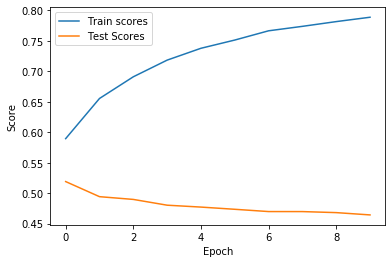

In [24]:
# TO DO part 3
plotScores(train_scores_mlp, test_scores_mlp)

ANSWERS  

TO DO part 4    
The train scores were much better than the test scores. This means that the model learns the training data well, but does note generalize well to the test data.   

TO DO part 5   
The train scores was better than the Logistic Regression Classifier's train score (by a lot), but the test scores were worse than the Logistic Regression Classifier's test score. This is due to the MLP overfitting the data. Since it performs well on the train set, it does not perform well on the test set due to poor generalization.

TO DO part 6   
Tracking the loss would be useful. We want to minimize the loss from the loss function while training to maximize performance.

**7. Trying a slightly different model with different feature selection**  
Now that we have run through the Baseline and the MLP classifiers, let us try one more MLP with a smaller feature selection. This time you will be creating the model by with random features to use from our original list of features. The following TO DO gives an overview of the entire task.

**(TO DO) Q9 - 5 marks**   
First, insert a seed of your choice for the randomization.  
Create a new list of features containing a random four features from featureSet, we call this list randomFeatures. Then use that list to complete the encoding process using ohe_rand.   
Once done, use the train_and_evaluate() function to train the model. Plot the results. Finally compare the test results from clf_rand (obtained here) with the results from clf_mlp (state which did better, posting the scores and the random feature set selected).

In [25]:
import random

# Setup a seed
random.seed(1)

# Setting up our one-hot encoder
ohe_rand = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

randomFeatures = random.sample(featureSet, k=4)
print(randomFeatures)

X_train_rand = X_train[randomFeatures].copy()
X_test_rand = X_test[randomFeatures].copy()
ohe_rand.fit(X_train_rand)

X_train_rand_encoded = ohe_rand.transform(X_train_rand)
X_test_rand_encoded = ohe_rand.transform(X_test_rand)

['age', 'time_in_hospital', 'race', 'num_medications']


Starting training...
Epoch:1/10 -- 2019-10-29 12:50:34.748749
Epoch:2/10 -- 2019-10-29 12:52:13.088505
Epoch:3/10 -- 2019-10-29 12:53:49.977058
Epoch:4/10 -- 2019-10-29 12:55:28.076432
Epoch:5/10 -- 2019-10-29 12:57:04.637284
Epoch:6/10 -- 2019-10-29 12:58:41.447336
Epoch:7/10 -- 2019-10-29 13:00:18.174669
Epoch:8/10 -- 2019-10-29 13:01:55.827930
Epoch:9/10 -- 2019-10-29 13:03:32.797960
Epoch:10/10 -- 2019-10-29 13:05:10.312229
Done training.


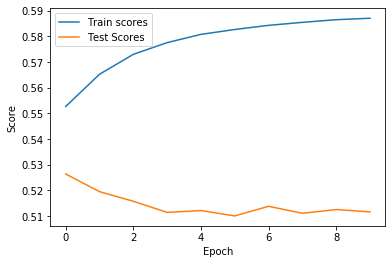

In [26]:
clf_rand = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=100, learning_rate_init=0.01, warm_start=True)

# ANSWER
# TO DO - Train the model, plot the results
train_scores_rand, test_scores_rand = train_and_evaluate(clf_rand, X_train_rand_encoded, y_train, X_test_rand_encoded, y_test, 10)
plotScores(train_scores_rand, test_scores_rand)

**8. Looking at the loss curve**  
We will do one final run of a MLP, but this time we will use solver="SGD". Using this allows us to look at the loss curve during it's training.

In [27]:
clf_sgd = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=150, learning_rate_init=0.1, warm_start=True)

In [28]:
# Plots the loss from the trained model
# NOTE: clf.loss_curve_ only exists when using solver="SGD"
def plot_loss(clf):
    plt.plot(clf.loss_curve_)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

**(TO DO) Q10 - 3 marks**   
Train and evaluate the model using train_and_evaluate (for 1 epoch, using X_train_sf_encoded and X_test_sf_encoded). Display the plot exhibiting the loss function when being trained. Briefly describe what the loss function represents (and why it's important).

Starting training...
Epoch:1/1 -- 2019-10-29 13:06:48.254301


c:\users\julian templeton\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done training.


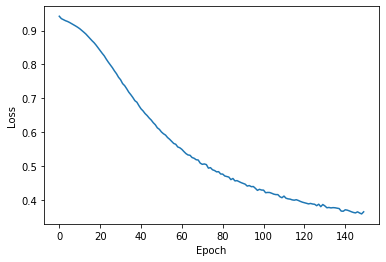

In [29]:
# ANSWER

train_and_evaluate(clf_sgd, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test, 1)
plot_loss(clf_sgd)

TO DO - What does the loss curve represent and why is it important?   
ANSWER:   

It represents the minimization of the loss function by optimizing the weights through Stochastic Gradient Descent and Backpropagation. This is important since this is how the network learns. Analyzing the loss curve shows how much the model is learning and gives us a better idea as to how to tweak the model.

#### Signature

I, SUZIE OH, declare that the answers provided in this notebook are my own.